In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Deep-Learning/Deep-Learning/(08) التنبؤ يأسعار المنازل باستخدام الشبكات العصبية/housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
X = df.values[:, 0:10]
Y = df.values[:, 10]

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print("X_train.shape : ",X_train.shape)
print("X_test.shape : ", X_test.shape)
print("X_val.shape : ", X_val.shape)
print("Y_val.shape : ", Y_val.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape)

X_train.shape :  (1022, 10)
X_test.shape :  (219, 10)
X_val.shape :  (219, 10)
Y_val.shape :  (219,)
Y_train.shape :  (1022,)
Y_test.shape :  (219,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3498 - loss: 0.7003 - val_accuracy: 0.4566 - val_loss: 0.6942
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5418 - loss: 0.6903 - val_accuracy: 0.5936 - val_loss: 0.6880
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6535 - loss: 0.6841 - val_accuracy: 0.6119 - val_loss: 0.6824
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6999 - loss: 0.6742 - val_accuracy: 0.6575 - val_loss: 0.6776
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7215 - loss: 0.6711 - val_accuracy: 0.6667 - val_loss: 0.6731
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7339 - loss: 0.6625 - val_accuracy: 0.6667 - val_loss: 0.6685
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7133 - loss: 0.6640 - val_accuracy: 0.6804 - val_loss: 0.6641
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7452 - loss: 0.6556 - val_accuracy: 0.6941 - 

In [ ]:
test_loss,test_accuracy=model.evaluate(X_test, Y_test)

print(test_loss)
print(test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9067 - loss: 0.2707 
0.3373892307281494
0.8904109597206116


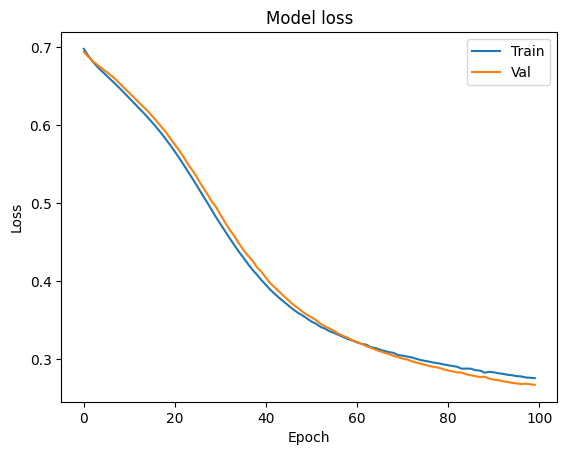

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

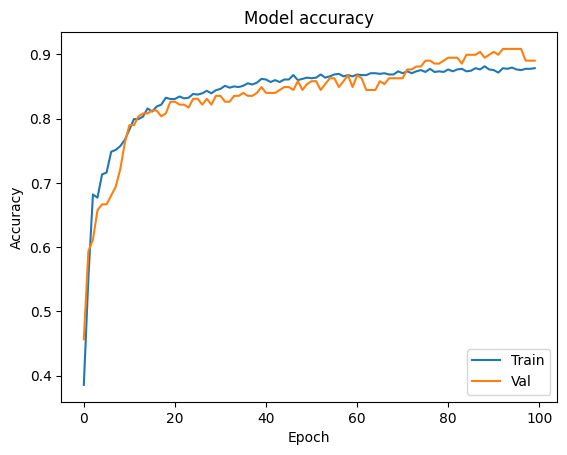

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6925 - loss: 0.5542 - val_accuracy: 0.8493 - val_loss: 0.3637
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8740 - loss: 0.3083 - val_accuracy: 0.8813 - val_loss: 0.3264
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8780 - loss: 0.3148 - val_accuracy: 0.9041 - val_loss: 0.2865
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8767 - loss: 0.2746 - val_accuracy: 0.9087 - val_loss: 0.2571
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8940 - loss: 0.2585 - val_accuracy: 0.9269 - val_loss: 0.2604
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8839 - loss: 0.2618 - val_accuracy: 0.8721 - val_loss: 0.2921
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9126 - loss: 0.2400 - val_accuracy: 0.8995 - val_loss: 0.2438
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8717 - loss: 0.2456 - val_accuracy: 0.

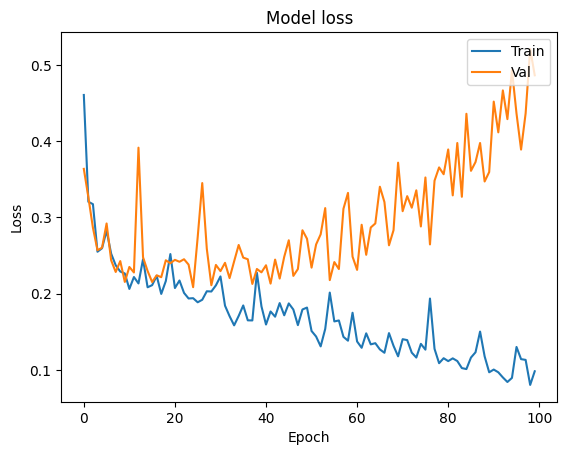

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

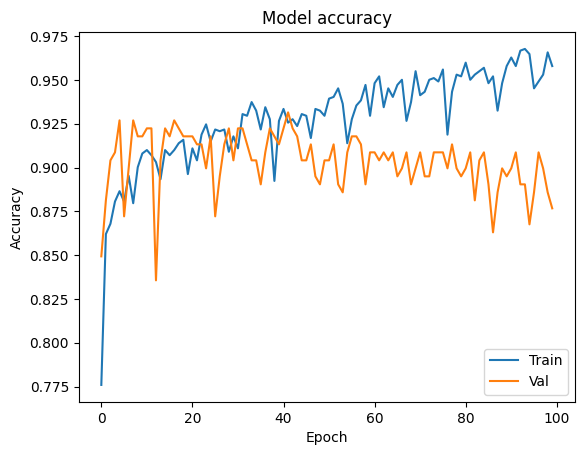

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5492 - loss: 21.1210 - val_accuracy: 0.8037 - val_loss: 3.8939
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8201 - loss: 2.4947 - val_accuracy: 0.7854 - val_loss: 0.7760
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.8493 - loss: 0.6255 - val_accuracy: 0.8950 - val_loss: 0.5041
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8537 - loss: 0.5567 - val_accuracy: 0.8813 - val_loss: 0.4820
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.8645 - loss: 0.5067 - val_accuracy: 0.8995 - val_loss: 0.4525
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8685 - loss: 0.4993 - val_accuracy: 0.8950 - val_loss: 0.4505
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8588 - loss: 0.4946 - val_accuracy: 0.8630 - val_loss: 0.4708
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.8645 - loss: 0.4910 - val_accuracy: 0

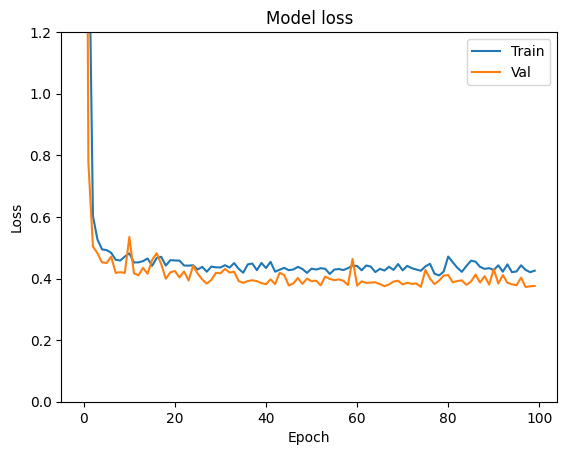

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

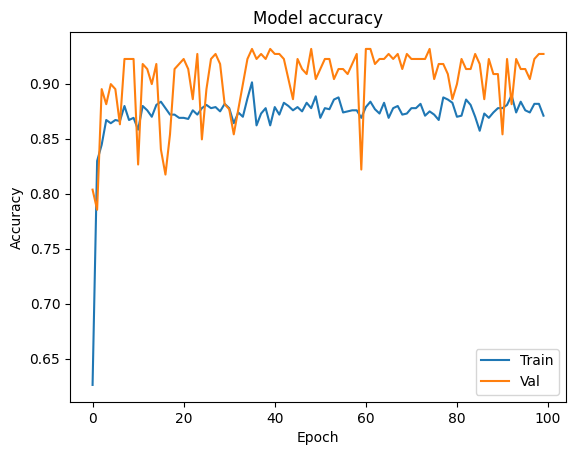

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import recall_score, f1_score, precision_score

In [ ]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
y_pred_classes=[]

for prob in y_pred:
    if prob >= 0.5:
        y_pred_classes.append(1)
    else:
        y_pred_classes.append(0)

In [ ]:
precision = precision_score(Y_test, y_pred_classes)

recall = recall_score(Y_test, y_pred_classes)

f1 = f1_score(Y_test, y_pred_classes)

print("Precision:", round(precision*100,0))
print("Recall:", round(recall*100,0))
print("F1 Score:", round(f1*100,0))

Precision: 90.0
Recall: 88.0
F1 Score: 89.0


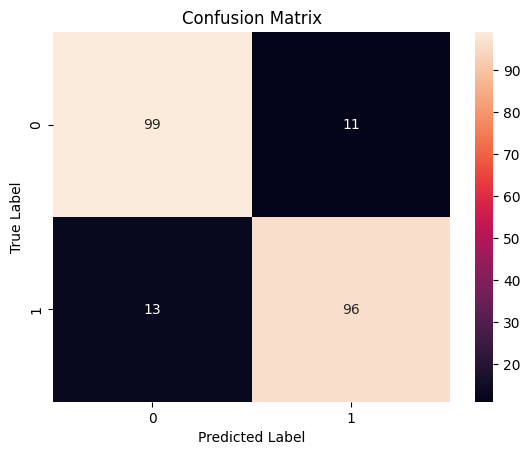

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(Y_test, y_pred_classes)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
model.save("houses_model.keras")

In [ ]:
from joblib import dump

dump(min_max_scaler, "houses_min_max_scaler.pkl")

['houses_min_max_scaler.pkl']

In [ ]:
import numpy as np

new_house = np.array( [[100,6,6,800, 2, 2, 3, 7, 1, 500]])

In [ ]:
from joblib import load

min_max_scaler_loaded = load("houses_min_max_scaler.pkl")

new_house = min_max_scaler.transform(new_house)
new_house

array([[-0.00560892,  0.55555556,  0.625     ,  0.1309329 ,  0.66666667,
         1.        ,  0.375     ,  0.41666667,  0.33333333,  0.35260931]])

In [ ]:
from keras.models import load_model

loaded_model = load_model("houses_model.keras")

In [ ]:
new_prediction_proba = loaded_model.predict(new_house)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[ True]]
